### Analyzing NHANES Health Survey Data

NHANES Data Analysis

Ellie Sepulveda, Allen Kuncheria, Steven Cloud, Nikolas Anderson


**Introduction**
National Health and Nutrition Examination Survey (NHANES) is an annual survey conducted by the CDC. NHANES combines questions and medical testing in order to provide insights into the health of the US. Variables range from categorical demographic information like citizensip status to measured numerical variables like blood pressure. We used the 2015/16 survey which conains 28 variables and 5735 observations. 

Our team was curious to explore which variables impacted most strongly a person's overall health, but we knew that this would be very dificult as no one variable in this survey can fully describe a person's wellbeing. Becuase of this, we decided instead to search for relationships between health variables and categorical demographic information with the goal of better understanding the health of the nation as a whole, and what factors may impact others more strongly. 

We decided to focus on BMI and Blood Pressure as they could be seen as proxies for health, as well as a person's average drinks per day of drinking and whether or not they are a smoker.

We focused on poverty status, access to health insurance, education level, and citizenship as predictors of BMI and blood pressure


**Standard Imports**

In [1]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import random
random.seed(2021)


**Read and clean data, create dataframe**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
nhanes = pd.read_csv('/content/drive/Shareddrives/DSCI101Fa21Team6/nhanes_2015_2016.csv')

In [4]:
#rename columns so that casual viewers know what they mean
nhanes_clean = nhanes.rename(columns={"ALQ101":"12 drinks in one year?", "ALQ110":"12 drinks in whole life?", "ALQ130":"Avg drinks per day", "SMQ020":"Smoking", "RIAGENDR":"Gender", "RIDAGEYR":"Age", "RIDRETH1":"Race","DMDCITZN": "Citizenship", "DMDMARTL":"Marital Status", "DMDHHSIZ": "Number of People in Household", "WTINT2YR": "Year 2 Sample Weights", "INDFMPIR": "PIR","DMDEDUC2":'Education Level', "BMXBMI":"BMI", "HIQ210":"Health Insurance","BPXSY1":"Blood Pressure (Systolic)" })
    

In [5]:
#fill 'non-responses' or 'don't know' responses initially coded as numbers with Na Values so that they do not impact data analysis innacuratley
nhanes_clean['Avg drinks per day'] =  nhanes_clean['Avg drinks per day'].replace({777:np.NaN, 999:np.NaN})
nhanes_clean['Smoking'] = nhanes_clean['Smoking'].replace({7:np.NaN, 9:np.NaN})
nhanes_clean['Education Level'] = nhanes_clean['Education Level'].replace({7:np.NaN, 9:np.NaN})
nhanes_clean['Martial Status'] = nhanes_clean['Marital Status'].replace({77:np.NaN})
nhanes_clean['Citizenship'] = nhanes_clean['Citizenship'].replace({7:np.NaN, 9:np.NaN})
nhanes_clean['Health Insurance'] = nhanes_clean['Health Insurance'].replace({9: np.NaN})

In [6]:
nhanes_clean.shape

(5735, 29)

**Data Exploration**
We started with univariate analysis to understand the distribution of some fo the variables

The following visualizations show the distribution of different variables in thes data set. We chose to visualize the variables that we thought were most relevant to our goals outlied above in order to get an inital understanding of our dataset. 

In [7]:
nhanes_clean['Avg drinks per day'].describe()

count    3375.000000
mean        2.732148
std         2.334369
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Avg drinks per day, dtype: float64

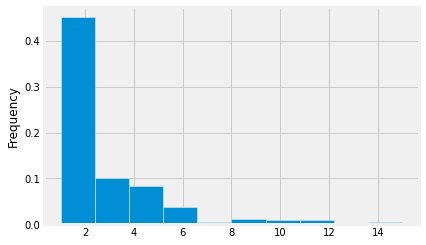

In [8]:
nhanes_clean['Avg drinks per day'].plot(kind = 'hist', density = True);

In [9]:
nhanes_clean['PIR'].describe()

count    5134.000000
mean        2.403204
std         1.601995
min         0.000000
25%         1.060000
50%         1.980000
75%         3.740000
max         5.000000
Name: PIR, dtype: float64

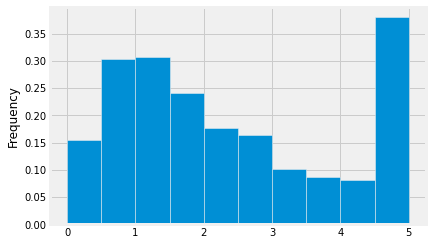

In [10]:
nhanes_clean['PIR'].plot(kind = 'hist', density = True);

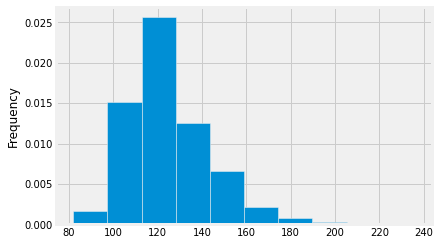

In [11]:
nhanes_clean['Blood Pressure (Systolic)'].plot(kind = 'hist', density = True);

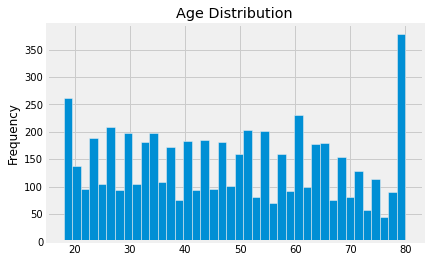

In [12]:
nhanes_clean['Age'].plot(kind='hist', bins=40, title='Age Distribution');

Text(0.5, 1.0, 'Smokers vs. Non-Smokers')

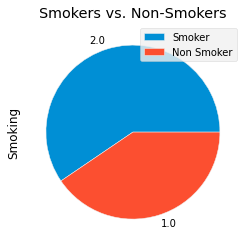

In [13]:
nhanes_clean['Smoking'].value_counts().plot(kind = 'pie')
plt.legend(['Smoker','Non Smoker']);
plt.title('Smokers vs. Non-Smokers')

We moved on to comparing pairs of variables to search for relationships. Just as with the above secion, the comparisons were chosen by what we thought may be interesting, and were used moreso as a means to understand the data than to draw conclusions.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


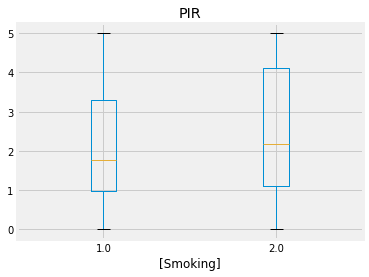

In [14]:
nhanes_clean.boxplot(column = ['PIR'], by =['Smoking'])

plt.suptitle('') 
plt.show()

Text(0.5, 1.0, 'Gender vs. Age')

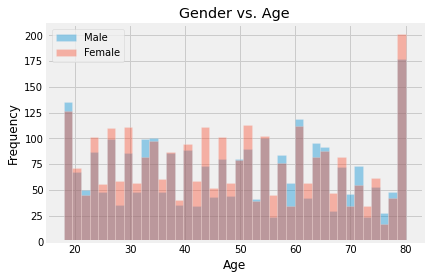

In [15]:
nhanes_clean[nhanes_clean['Gender']==1]['Age'].plot(kind='hist', bins=40, label='Male', alpha=0.4)
nhanes_clean[nhanes_clean['Gender']==2]['Age'].plot(kind='hist', bins=40, label='Female', alpha=0.4)
plt.legend();
plt.xlabel('Age')
plt.title('Gender vs. Age')

Text(0.5, 1.0, 'Gender vs. BMI')

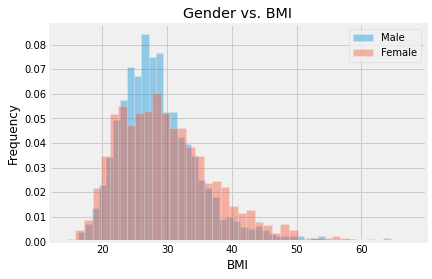

In [16]:
nhanes_clean[nhanes_clean['Gender']==1]['BMI'].plot(kind='hist', bins=40, density=True, label='Male', alpha=0.4)
nhanes_clean[nhanes_clean['Gender']==2]['BMI'].plot(kind='hist', bins=40, density=True, label='Female', alpha=0.4)
plt.legend();
plt.xlabel('BMI')
plt.title('Gender vs. BMI')

In [18]:
nhanes_clean.head()

,SEQN,12 drinks in one year?,12 drinks in whole life?,Avg drinks per day,Smoking,Gender,Age,Race,Citizenship,Education Level,Marital Status,Number of People in Household,Year 2 Sample Weights,SDMVPSU,SDMVSTRA,PIR,Blood Pressure (Systolic),BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,Health Insurance,Martial Status
0,83732,1.0,NaN,1.0,1.0,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,1.0
1,83733,1.0,NaN,6.0,1.0,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,3.0
2,83734,1.0,NaN,NaN,1.0,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,1.0
3,83735,2.0,1.0,1.0,2.0,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,6.0
4,83736,2.0,1.0,1.0,2.0,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,3.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Health Insurance vs. BMI')

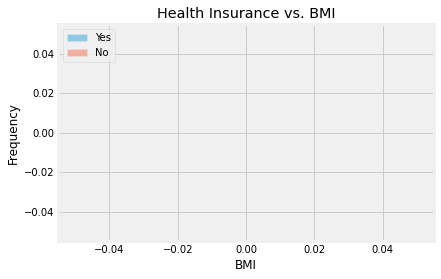

In [17]:
nhanes_clean[nhanes_clean['Health Insurance']=='Yes']['BMI'].plot(kind='hist', bins=40, density=True, label='Yes', alpha=0.4)
nhanes_clean[nhanes_clean['Health Insurance']=='No']['BMI'].plot(kind='hist', bins=40, density=True, label='No', alpha=0.4)
plt.legend();
plt.xlabel('BMI')
plt.title('Health Insurance vs. BMI')

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Smoking Status vs. BMI')

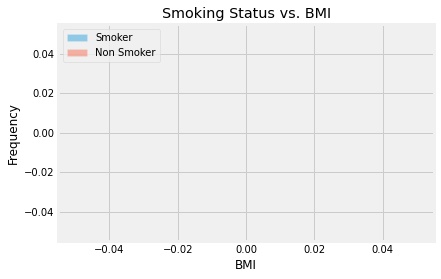

In [19]:
nhanes_clean[nhanes_clean['Smoking']=='Smoker']['BMI'].plot(kind='hist', bins=40, density=True, label='Smoker', alpha=0.4)
nhanes_clean[nhanes_clean['Smoking']=='Non-Smoker']['BMI'].plot(kind='hist', bins=40, density=True, label='Non Smoker', alpha=0.4)
plt.legend();
plt.xlabel('BMI')
plt.title('Smoking Status vs. BMI')

Text(0.5, 1.0, 'Race vs. Education Level')

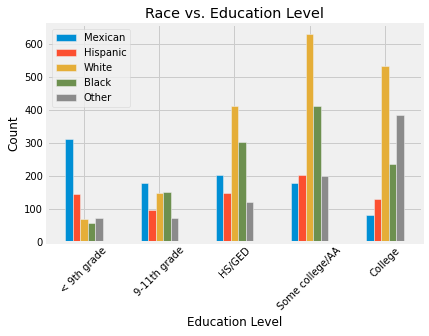

In [20]:
ed_race = nhanes_clean.pivot_table(index='Education Level', columns='Race', values='SEQN', aggfunc='count', fill_value=0)
ed_race.plot(kind='bar')
# fix race label: Mexican American, Other Hispanic, Non-Hispanic White,Non-Hispanic Black,Other Race Including Multi-Racial
plt.legend(['Mexican','Hispanic','White','Black','Other'])
# fix ed level label: from codebook
plt.xticks(np.arange(5),['< 9th grade', '9-11th grade', 'HS/GED', 'Some college/AA', 'College'], rotation=45);
plt.ylabel('Count')
plt.title('Race vs. Education Level')

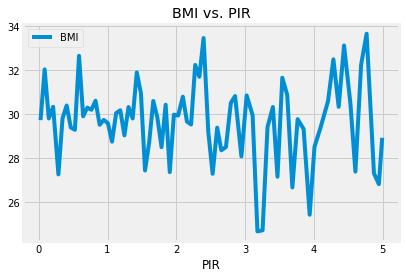

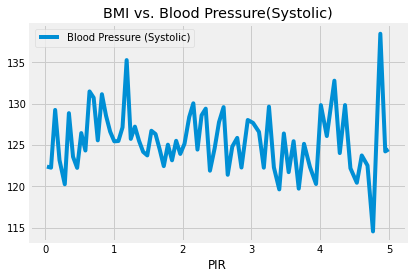

In [ ]:
pir_bmi = nhanes_clean.groupby('PIR', as_index=False)['BMI'].mean()
pir_bmi_plot = pir_bmi.groupby(np.arange(len(pir_bmi))//6).mean().plot(x = "PIR", y = "BMI", title='BMI vs. PIR')

pir_bps = nhanes_clean.groupby('PIR', as_index=False)['Blood Pressure (Systolic)'].mean()
pir_bps_plot = pir_bps.groupby(np.arange(len(pir_bps))//6).mean().plot(x = "PIR", y = 'Blood Pressure (Systolic)', title='BMI vs. Blood Pressure(Systolic)')



Text(0, 0.5, 'Drinks Per Day')

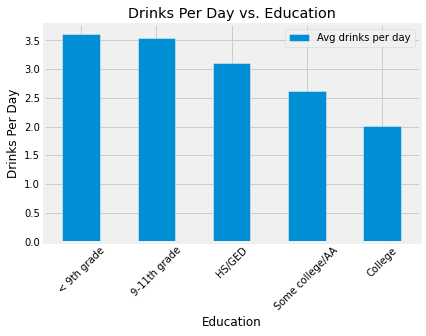

In [ ]:
edu_alc = nhanes_clean.groupby('Education Level', as_index=False)['Avg drinks per day'].mean()
edu_alc_plot = edu_alc.plot(kind = 'bar', x = "Education Level", y = "Avg drinks per day")
plt.xticks(np.arange(5), ['< 9th grade', '9-11th grade', 'HS/GED', 'Some college/AA', 'College'], rotation = 45)
plt.title('Drinks Per Day vs. Education')
plt.xlabel('Education')
plt.ylabel('Drinks Per Day')

Text(0, 0.5, 'Percentage That Smoked 100+ Cigs Lifetime')

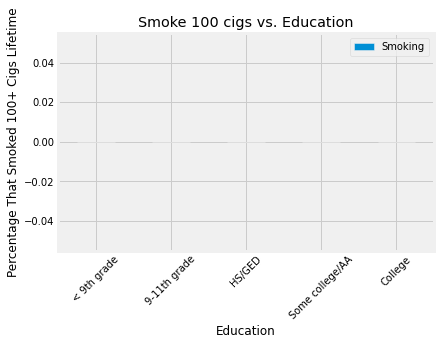

In [21]:
smoke_100_cigs_count = nhanes_clean[nhanes_clean.Smoking == "Smoker"].groupby('Education Level').count()
total_count = nhanes_clean.groupby('Education Level').count()

percentage = smoke_100_cigs_count/total_count * 100
percentage['Education Level'] = percentage.index
percentage

smoke_100_plot = percentage.plot(kind = 'bar', x = "Education Level", y = "Smoking")
plt.xticks(np.arange(5), ['< 9th grade', '9-11th grade', 'HS/GED', 'Some college/AA', 'College'], rotation = 45)
plt.title('Smoke 100 cigs vs. Education')
plt.xlabel('Education')
plt.ylabel('Percentage That Smoked 100+ Cigs Lifetime')

In [22]:
nhanes_clean.pivot_table(columns = 'Smoking', values = 'PIR', aggfunc= 'mean')

Smoking,1.0,2.0
PIR,2.222975,2.527789


In [23]:
nhanes_clean.pivot_table(columns = 'Smoking', values = 'BMI', aggfunc= 'mean')

Smoking,1.0,2.0
BMI,29.59077,29.241384


In [24]:
nhanes_clean.pivot_table(columns = 'Smoking', values = 'Avg drinks per day', aggfunc= 'mean')

Smoking,1.0,2.0
Avg drinks per day,3.149621,2.363585


The three pivot tables above show that smoking may be a notable indicator of a person's PIR, BMI, and/or drinking

**Hypothesis Testing**
Based on the above exploration, we saw a number of interesting relationships. However, we were most interested to explore the relationship between health insurance and BMI as an indicator of health. Given that having insurance allows someone to have better medical care, we hypothesized that not having lost health insurance in the last 12 months would correlate with a less obese BMI, and carried out A/B hypothesis testing with a significance level of 5%

**Null Hypothesis**: There is no difference in BMI between those who have lost health insurance and those who have not

**Alternative Hypothesis**: If someone has lost health insurance in the last 12 moths, then they are likelier to have an obese BMI than someone who has not


In [25]:
nhanes_clean['Health Insurance'] = nhanes_clean['Health Insurance'].replace({1.0:'Yes', 2.0:'No'})

In [26]:
insurance_and_bmi = nhanes_clean[['BMI', "Health Insurance"]]

In [27]:
observed_mean = insurance_and_bmi.groupby(by='Health Insurance').mean()
observed_mean

,BMI
Health Insurance,
No,29.419168
Yes,29.060927


In [28]:
observed_difference= observed_mean.loc['Yes','BMI'] - observed_mean.loc['No','BMI']
observed_difference

-0.35824050523279993

In [29]:
simu_stats = []
rep = 2000

for i in np.arange(rep):
    # code to shuffle group labels and calculate the simulated stats
    shuffled_insurance = np.random.permutation(insurance_and_bmi['Health Insurance'])
    shuffled = insurance_and_bmi[['BMI']]
    shuffled['Health Insurance'] = shuffled_insurance
    group_tb = shuffled.groupby(by='Health Insurance').mean()
    difference = group_tb.loc['Yes', 'BMI'] - group_tb.loc['No', 'BMI']
    simu_stats = np.append(simu_stats, difference)

simu_stats

array([-0.16419405,  0.0101916 ,  0.21199684, ..., -0.33940899,
       -0.16927244,  0.65972515])

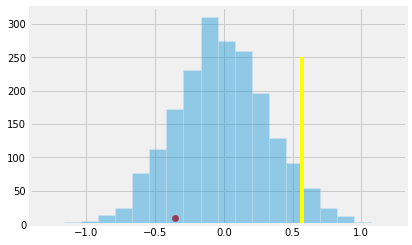

In [30]:
# visualization
cut_off = np.percentile(simu_stats, 95)
plt.plot([cut_off, cut_off], [0,250], color='yellow')
plt.hist(simu_stats, bins=20, alpha=0.4)
plt.scatter(observed_difference, 10, color='red', s=40);

In [31]:
#p-value
p_value= np.average(simu_stats <= observed_difference)

In [32]:
#compare p-value to cutoff (significance level)
cut_off,p_value

(0.5708320473141117, 0.156)

We obtain a p-value of 0.147 which is larger than significance level 0.05. Therefore we fail to reject the null, and conclude there is no statistically significant difference of BMI between people with and without health insurance in the past 12 month. The theory that health insurance impacts BMI can neither be confirmed nor rejected based on this hypothesis test.

**Advanced Data Analysis**


We contined with more advanced data analysis with the goal of further examining the relationship between multiple variables in this data set. These techniques allow us to get a better understanding of what correlational relationships may exist in our data. 

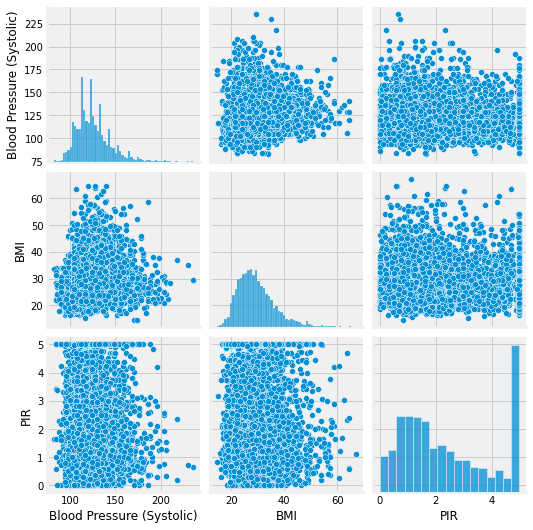

In [33]:
# pick a list of numerical columns
num_cols = ["Blood Pressure (Systolic)", "BMI", "PIR"]
# select those columns
select_df = nhanes_clean[num_cols]
# scatter plot matrix
sns.pairplot(select_df);

The curves on the diagonals are where each variable lines up with itself, so instead of a scatterplot it becomes a histogram showing the distribution of the data. The scatterplots of blood pressure v. BMI seemed to have to most obvious cluster of values, with most falling in the same area. PIR v. Blood pressure seemed to have a slight cluster with lower PIR values yeilding higher blood pressure. Then BMI and PIR had the smallest looking relationship, with values distributed across the entire graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


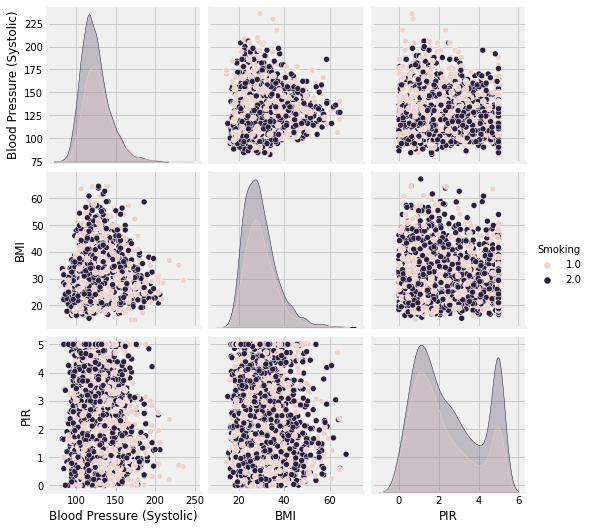

In [34]:
#comparing smoking to the variables in the above graphs
cat_col = "Smoking"

select_df[cat_col] = nhanes_clean[cat_col]
# color coded scatter plot matrix
sns.pairplot(select_df, hue=cat_col);

The visualization allows us to examine both how two numerical variables in each of the graphs inerract, and also how these two variables relate to the categorical variable of smoking. From the above graphs it does not appear that smoking status impacts any of the above numerical relationships. 

In [35]:
nhanes_no_na = nhanes_clean[["BMI", "Age", "Health Insurance", "Blood Pressure (Systolic)"]].dropna()

In [36]:
#cleaning na's to prepare for Principal Component Analysis
nhanes_no_na = nhanes_clean[nhanes_clean["Blood Pressure (Systolic)"].notna()]
nhanes_no_na = nhanes_no_na[nhanes_clean["BMI"].notna()]
nhanes_no_na = nhanes_no_na[nhanes_clean["PIR"].notna()]
nhanes_no_na = nhanes_no_na[nhanes_clean["Age"].notna()]
nhanes_no_na = nhanes_no_na[nhanes_clean["Number of People in Household"].notna()]


all_num_cols = ["Blood Pressure (Systolic)", "BMI", "PIR", "Age", "Number of People in Household"]
num_df = nhanes_no_na[all_num_cols]
num_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Blood Pressure (Systolic),BMI,PIR,Age,Number of People in Household
0,128.0,27.8,4.39,62,2
1,146.0,30.8,1.32,53,1
2,138.0,28.8,1.51,78,2
3,132.0,42.4,5.00,56,1
4,100.0,20.3,1.23,42,5
...,...,...,...,...,...
5730,112.0,21.5,1.43,76,1
5731,118.0,33.8,2.99,26,3
5732,154.0,31.0,2.97,80,1
5733,104.0,26.0,0.00,35,5


**Principal Component Analysis**

We used PCA to attempt to answer the question: Can Blood Pressure (Systolic), BMI, PIR, Age, and the Number of People in a Household predict a person’s response to the smoking question?

PCA lowers dimentionality and should allow you to see clusters of observations with similar features. 

In [37]:
from sklearn.decomposition import PCA
# Choose how many PCs you want, remember how many you can have at most?
# You can have more PCs and choose to only look at the first few
pca = PCA(n_components=2) 
your_pca = pca.fit_transform(num_df) 

In [38]:
pca.explained_variance_ratio_

array([0.67684069, 0.24824748])

In [39]:
sum(pca.explained_variance_ratio_)

0.9250881645861486

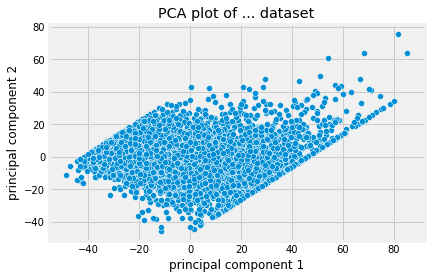

In [40]:
sns.scatterplot(x=your_pca[:,0], y=your_pca[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA plot of ... dataset');

In [41]:
#outliers
num_df[your_pca[:,1]>40]

,Blood Pressure (Systolic),BMI,PIR,Age,Number of People in Household
512,188.0,27.3,2.61,54,6
605,236.0,29.3,0.66,52,4
903,204.0,31.0,1.94,69,1
1585,218.0,36.8,0.20,51,2
1791,230.0,34.9,0.71,63,2
1951,170.0,27.5,1.10,32,6
2067,170.0,37.0,4.02,35,4
2190,196.0,28.4,0.31,49,5
2362,198.0,21.7,1.57,59,2
2540,206.0,28.2,1.52,61,2


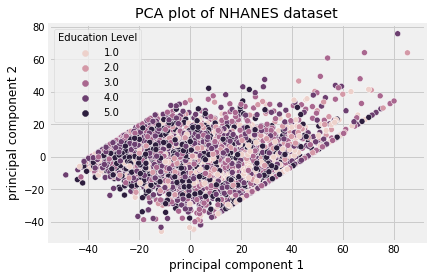

In [42]:
cat_col = "Education Level"
sns.scatterplot(x=your_pca[:,0], y=your_pca[:,1], 
                hue=nhanes_no_na[cat_col])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA plot of NHANES dataset');

There do not seem to be any obvious clusters here, so these five variables likley not useful or only slightly useful on predicting educaiton level

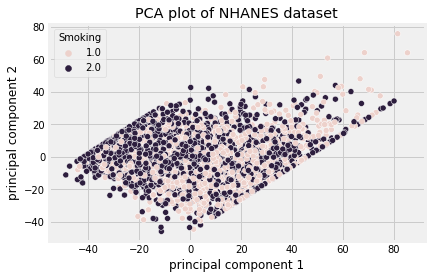

In [43]:
cat_col = "Smoking"
sns.scatterplot(x=your_pca[:,0], y=your_pca[:,1], 
                hue=nhanes_no_na[cat_col])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA plot of NHANES dataset');

PCA shows 2 semi-clusters
These 5 variables moderately predict if someone has smoked 100 cigarettes in their lifetime.


**Clustering**

Similar to PCA, clustering could be used to find relationships that were otherwise unseen by illustrating new patterns in the data

In [44]:
#Isolate columns that will be used for clustering
cluster_cols = ["Blood Pressure (Systolic)", "BMI", "PIR", "Age","Number of People in Household"]
df_cluster = nhanes_no_na[cluster_cols]
df_cluster

,Blood Pressure (Systolic),BMI,PIR,Age,Number of People in Household
0,128.0,27.8,4.39,62,2
1,146.0,30.8,1.32,53,1
2,138.0,28.8,1.51,78,2
3,132.0,42.4,5.00,56,1
4,100.0,20.3,1.23,42,5
...,...,...,...,...,...
5730,112.0,21.5,1.43,76,1
5731,118.0,33.8,2.99,26,3
5732,154.0,31.0,2.97,80,1
5733,104.0,26.0,0.00,35,5


In [45]:
#Standardize data
df_cluster_stad = (df_cluster - df_cluster.mean()) / df_cluster.std()
df_cluster_stad

,Blood Pressure (Systolic),BMI,PIR,Age,Number of People in Household
0,0.182631,-0.226718,1.242678,0.788022,-0.760844
1,1.174846,0.199034,-0.674907,0.293681,-1.347428
2,0.733862,-0.084801,-0.556229,1.666852,-0.760844
3,0.403123,1.845277,1.623697,0.458461,-1.347428
4,-1.360814,-1.291099,-0.731123,-0.310514,0.998907
...,...,...,...,...,...
5730,-0.699338,-1.120799,-0.606199,1.556998,-1.347428
5731,-0.368599,0.624787,0.368209,-1.189344,-0.174261
5732,1.615830,0.227418,0.355717,1.776705,-1.347428
5733,-1.140322,-0.482170,-1.499406,-0.695002,0.998907


In [46]:
#Use K-means clustering to form 2 clusters
from sklearn import cluster
your_kmeans = cluster.KMeans(n_clusters=2, random_state=2021).fit(df_cluster_stad)

In [47]:
#Append column of cluster to dataset
cluster_labeled_df = nhanes_no_na.copy()
cluster_labeled_df["k-means cluster"] = your_kmeans.labels_
cluster_labeled_df

,SEQN,12 drinks in one year?,12 drinks in whole life?,Avg drinks per day,Smoking,Gender,Age,Race,Citizenship,Education Level,Marital Status,Number of People in Household,Year 2 Sample Weights,SDMVPSU,SDMVSTRA,PIR,Blood Pressure (Systolic),BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,Health Insurance,Martial Status,k-means cluster
0,83732,1.0,NaN,1.0,1.0,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,No,1.0,0
1,83733,1.0,NaN,6.0,1.0,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,3.0,0
2,83734,1.0,NaN,NaN,1.0,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,No,1.0,0
3,83735,2.0,1.0,1.0,2.0,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,No,6.0,0
4,83736,2.0,1.0,1.0,2.0,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,No,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1.0,2,76,3,1.0,3.0,2.0,1,58614.08,2,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,No,2.0,0
5731,93696,2.0,2.0,NaN,2.0,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,No,1.0,1
5732,93697,1.0,NaN,1.0,1.0,2,80,3,1.0,4.0,2.0,1,49050.06,2,132,2.97,154.0,56.0,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,No,2.0,0
5733,93700,NaN,NaN,NaN,1.0,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,No,1.0,1


In [48]:
#Only output rows with cluster value of 1
cluster_labeled_df[cluster_labeled_df["k-means cluster"] == 1]

,SEQN,12 drinks in one year?,12 drinks in whole life?,Avg drinks per day,Smoking,Gender,Age,Race,Citizenship,Education Level,Marital Status,Number of People in Household,Year 2 Sample Weights,SDMVPSU,SDMVSTRA,PIR,Blood Pressure (Systolic),BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,Health Insurance,Martial Status,k-means cluster
4,83736,2.0,1.0,1.0,2.0,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,No,3.0,1
6,83741,1.0,NaN,8.0,1.0,1,22,4,1.0,4.0,5.0,3,37043.09,2,128,2.08,110.0,70.0,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN,5.0,1
7,83742,1.0,NaN,1.0,2.0,2,32,1,2.0,4.0,1.0,4,22744.36,1,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,No,1.0,1
11,83750,1.0,NaN,3.0,1.0,1,45,5,1.0,2.0,5.0,5,96194.93,1,125,1.36,116.0,70.0,108.0,72.0,76.2,177.8,24.1,43.9,37.8,33.0,90.1,NaN,5.0,1
12,83752,1.0,NaN,2.0,1.0,2,30,2,1.0,4.0,6.0,2,36978.42,1,124,5.00,104.0,50.0,104.0,50.0,71.2,163.6,26.6,37.3,35.7,31.0,90.7,No,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,93690,1.0,NaN,3.0,2.0,1,32,2,1.0,2.0,1.0,4,43971.60,2,127,5.00,112.0,60.0,118.0,58.0,89.5,164.9,32.9,40.0,38.0,39.0,101.0,No,1.0,1
5729,93691,2.0,2.0,NaN,2.0,1,25,5,2.0,5.0,5.0,7,13525.39,2,133,1.59,112.0,80.0,112.0,76.0,39.2,136.5,21.0,33.6,29.7,23.8,75.4,No,5.0,1
5731,93696,2.0,2.0,NaN,2.0,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,No,1.0,1
5733,93700,NaN,NaN,NaN,1.0,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,No,1.0,1


In [49]:
#compring membership, there does not seem to be a strong difference between cluster membership
cluster_labeled_df.pivot_table(index='Race', columns='k-means cluster', values='SEQN', aggfunc='count')

k-means cluster,0,1
Race,,
1,314,529
2,296,324
3,877,744
4,493,487
5,244,482


In [50]:
#Create pivot table of total number of clusters per education level
cluster_labeled_df.pivot_table(index='Education Level', columns='k-means cluster', values='SEQN', aggfunc='count')

k-means cluster,0,1
Education Level,,
1.0,297,223
2.0,239,284
3.0,514,495
4.0,646,729
5.0,527,625


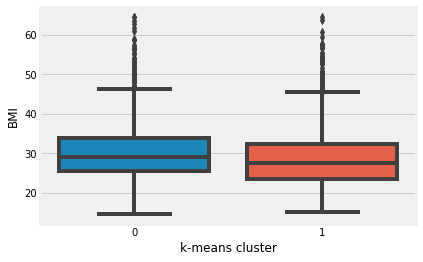

In [51]:
### plot cluster membership and a numerical variable see if there's any difference between 2 clusters
sns.boxplot(x='k-means cluster', y='BMI', data=cluster_labeled_df);

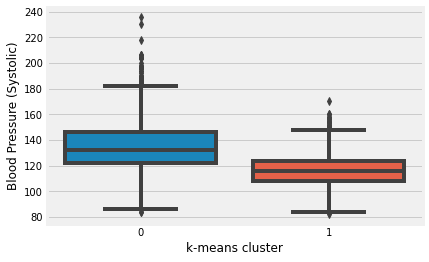

In [52]:
sns.boxplot(x='k-means cluster', y='Blood Pressure (Systolic)', data=cluster_labeled_df);

The above clustering did not show mu

**Machine Learning**

In [53]:
#Some more libraries imported for linear regression
from scipy.stats.mstats import zscore

import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [54]:
nhanes_no_na = nhanes_clean[["BMI", "Age", "Health Insurance", "Blood Pressure (Systolic)"]].dropna()


In [55]:
#Create regression and classification variables
reg_feature = 'Age'
reg_response = 'BMI'
class_features = ['BMI','Blood Pressure (Systolic)']
class_response = 'Health Insurance'

In [56]:
# use this for regression, comment out the other
X = nhanes_no_na[[reg_feature]]
y = nhanes_no_na[reg_response]
# use this for classification, comment out the other
#X = nhanes_no_na[class_features]
#y = nhanes_no_na[class_response]

In [57]:
#Split data into train/testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [58]:
# check the shape of train and test sets
[X_train.shape, y_train.shape, X_test.shape, y_test.shape]

[(3297, 1), (3297,), (1099, 1), (1099,)]

**KNN Regression**

In [ ]:
from sklearn import neighbors
# n_neighbors is the hyperparameter of your knn model
# for now, pick a random number to test
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=9)
your_knn_reg = knn_reg.fit(X_train, y_train)

In [ ]:
# make prediction on both training and testing feature matrix
y_train_hat = your_knn_reg.predict(X_train)
y_test_hat = your_knn_reg.predict(X_test)

In [ ]:
#Get training/testing RMSE
from sklearn.metrics import mean_squared_error as mse
print("Training RMSE:", np.sqrt(mse(y_train, y_train_hat)))
print("Testing RMSE:", np.sqrt(mse(y_test, y_test_hat)))

Training RMSE: 7.064863371219076
Testing RMSE: 7.359121950218199


In [ ]:
#Set number of neighbors for KNN
K = 9

In [ ]:
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=K)
your_knn_reg_final = knn_reg.fit(X, y)

In [ ]:
step = (max(nhanes_no_na[reg_feature]) - min(nhanes_clean[reg_feature]))/100
X_min = min(nhanes_no_na[reg_feature]) - step
X_max = max(nhanes_no_na[reg_feature]) + step

In [ ]:
# make up some X values to predict
# we pretend this is the new X value which we do not know the corresponding y
# this is for visualization only
step = (max(nhanes_no_na[reg_feature]) - min(nhanes_no_na[reg_feature]))/100
X_min = min(nhanes_no_na[reg_feature]) - step
X_max = max(nhanes_no_na[reg_feature]) + step

# pick a step to create a sequence of feature X values
# this depends on the scale of X
X_plot = np.arange(X_min, X_max, step) # this is a 1-d array
# reshape into a feature matrix with one column 
X_plot = X_plot.reshape((len(X_plot), 1))
y_plot = your_knn_reg_final.predict(X_plot)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


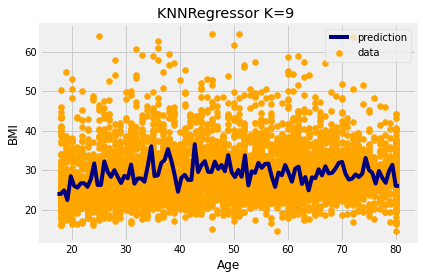

In [ ]:
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_plot, y_plot, color='navy', label='prediction')
plt.axis('tight')
plt.xlabel(reg_feature)
plt.ylabel(reg_response)
plt.legend()
plt.title('KNNRegressor K=%i '% K);

**KNN Classification**

In [59]:
#Subset X and Y variables and create training/testing data
X = nhanes_no_na[class_features]
y = nhanes_no_na[class_response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [60]:
from sklearn import neighbors

knn_class = neighbors.KNeighborsClassifier(n_neighbors= 3)
your_knn_class = knn_class.fit(X_train, y_train)

In [61]:
#prediction on both training and testing feature matrix
y_train_hat = your_knn_class.predict(X_train)
y_test_hat = your_knn_class.predict(X_test)

In [62]:
from sklearn.metrics import zero_one_loss
print("Training misclassification error:", zero_one_loss(y_train_hat, y_train))
print("Testing misclassification error:", zero_one_loss(y_test_hat, y_test))

Training misclassification error: 0.0858356081286018
Testing misclassification error: 0.12283894449499544


In [63]:
K = 3

In [64]:
knn_class = neighbors.KNeighborsClassifier(n_neighbors=K)
your_knn_class_final = knn_class.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


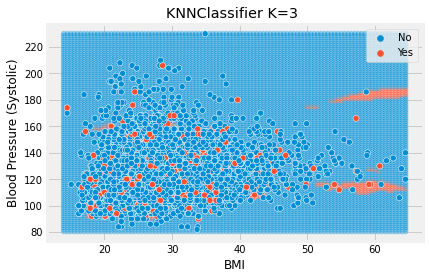

In [65]:
# plot the decision boundary with original data
step1 = (X.iloc[:,0].max()-X.iloc[:,0].min())/100
step2 = (X.iloc[:,1].max()-X.iloc[:,1].min())/100
x_min, x_max = X.iloc[:,0].min()-step1, X.iloc[:,0].max()+step1
y_min, y_max = X.iloc[:,1].min()-step2, X.iloc[:,1].max()+step2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step1), np.arange(y_min, y_max, step2))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z = your_knn_class_final.predict(X_grid)

sns.scatterplot(x=X_grid[:,0], y=X_grid[:,1], hue=Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, legend=False)
plt.title('KNNClassifier K=%i '% K);

**Linear Regression**

Preparing the data for regression:

In [66]:
# drop any columns that does not make sense to include as features
drop = ['SEQN' ,'Number of People in Household', 'SDMVPSU', 'SDMVSTRA']

In [67]:
X_full = nhanes_clean.drop(columns= drop)
y = nhanes_clean[reg_response]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25, random_state=2021)

In [69]:
nhanes_no_na

,BMI,Age,Health Insurance,Blood Pressure (Systolic)
0,27.8,62,No,128.0
2,28.8,78,No,138.0
3,42.4,56,No,132.0
4,20.3,42,No,100.0
7,28.2,32,No,120.0
...,...,...,...,...
5730,21.5,76,No,112.0
5731,33.8,26,No,118.0
5732,31.0,80,No,154.0
5733,26.0,35,No,104.0


In [70]:
X_full_dummy = pd.get_dummies(X_full)
X_full_dummy.head()

,12 drinks in one year?,12 drinks in whole life?,Avg drinks per day,Smoking,Gender,Age,Race,Citizenship,Education Level,Marital Status,Year 2 Sample Weights,PIR,Blood Pressure (Systolic),BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,Martial Status,Health Insurance_No,Health Insurance_Yes
0,1.0,NaN,1.0,1.0,1,62,3,1.0,5.0,1.0,134671.37,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,1.0,1,0
1,1.0,NaN,6.0,1.0,1,53,3,2.0,3.0,3.0,24328.56,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,3.0,0,0
2,1.0,NaN,NaN,1.0,1,78,3,1.0,3.0,1.0,12400.01,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,1.0,1,0
3,2.0,1.0,1.0,2.0,2,56,3,1.0,5.0,6.0,102718.00,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,6.0,1,0
4,2.0,1.0,1.0,2.0,2,42,4,1.0,4.0,3.0,17627.67,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,3.0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full_dummy, y, test_size=0.25, random_state=2021)

Linear Regression:

In [ ]:
#Removing rows that contain NA in 5 columns of interest
nhanes_no_na = nhanes_clean[["BMI", "PIR", "Age", "Blood Pressure (Systolic)", "Avg drinks per day"]].dropna()
nhanes_clean

#Create linaer regression X and Y variables
reg_features = ['BMI', "PIR", "Age", "Avg drinks per day"]
response = 'Blood Pressure (Systolic)'

X = nhanes_no_na[reg_features]
y = nhanes_no_na[response]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021) 

# check the shape of train and test sets
[X_train.shape, y_train.shape, X_test.shape, y_test.shape] 

[(2211, 4), (2211,), (737, 4), (737,)]

In [ ]:
#Create linear regression model
from sklearn.linear_model import LinearRegression
ls_model = LinearRegression(fit_intercept=True)
ls_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# print out model coefficients
#pd.Series(ls_model.coef_, index=X_full.columns)
print(ls_model.coef_) #BMI: 0.3139, PIR: -0.694, Age: 0.4604, Avg drinks per day: 0.61
print(ls_model.intercept_) #93.8155

[ 0.31391789 -0.69414392  0.46042155  0.61048551]
93.8155462196143


Coefficients can be interperted as "For each increase in a unit of BMI, the Systolic Blood Pressure increases by 0.3139 units." It's important to note that coefficients don't tell you what variables have a larger impact on response variable since they are not standardized, so differences in values of predictor variables can cause the coefficients to be misleading.

In [ ]:
# model.predict on both training and testing
y_train_hat = ls_model.predict(X_train)
y_test_hat = ls_model.predict(X_test)

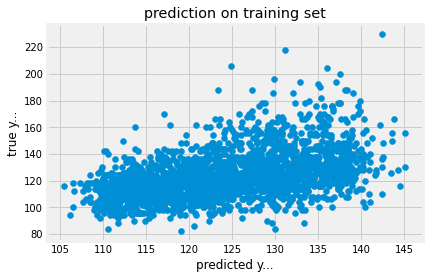

In [ ]:
# plot predicted vs. true label on training
plt.scatter(x=y_train_hat, y=y_train)
plt.xlabel("predicted y...")
plt.ylabel("true y...")
plt.title("prediction on training set");

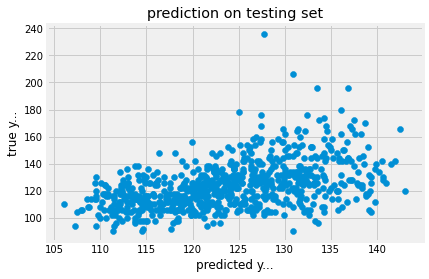

In [ ]:
# plot predicted vs. true label on testing
plt.scatter(x=y_test_hat, y=y_test)
plt.xlabel("predicted y...")
plt.ylabel("true y...")
plt.title("prediction on testing set");

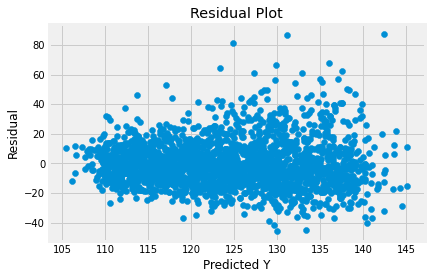

In [ ]:
residual = y_train - y_train_hat
plt.scatter(x=y_train_hat, y=residual)
plt.xlabel("Predicted Y")
plt.ylabel("Residual")
plt.title("Residual Plot");

The residual plot can be used to check assumptions of the MLR model such as independent errors as well as constant variance, which both appear to be satisfied.


In [ ]:
#Print training/testing RMSE
from sklearn.metrics import mean_squared_error as mse
print("Training RMSE:", np.sqrt(mse(y_train, y_train_hat)))
print("Testing RMSE:", np.sqrt(mse(y_test, y_test_hat)))

Training RMSE: 15.52829978917269
Testing RMSE: 15.265395509645147


In [ ]:
#More analysis attempt with p-values to see significance of coefficients
##P-Values
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
#P-values all below alpha level of 0.05

                                OLS Regression Results                               
Dep. Variable:     Blood Pressure (Systolic)   R-squared:                       0.225
Model:                                   OLS   Adj. R-squared:                  0.224
Method:                        Least Squares   F-statistic:                     213.9
Date:                       Mon, 06 Dec 2021   Prob (F-statistic):          2.68e-161
Time:                               04:08:44   Log-Likelihood:                -12255.
No. Observations:                       2948   AIC:                         2.452e+04
Df Residuals:                           2943   BIC:                         2.455e+04
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [ ]:
#More analysis with standardized coefficients to see impact of coefficients
##Standardized Coefficients
print(sm.OLS(zscore(y), zscore(X)).fit().summary())
#All significant p-values and standardized coefficients as follows
#BMI: 0.1216
#PIR: -0.0814
#Age: 0.4578
#Avg drinks per day: 0.0837
#This can represent effect on blood pressure of variables relative to each other.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.225
Model:                            OLS   Adj. R-squared (uncentered):              0.224
Method:                 Least Squares   F-statistic:                              214.0
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   2.36e-161
Time:                        04:08:51   Log-Likelihood:                         -3806.9
No. Observations:                2948   AIC:                                      7622.
Df Residuals:                    2944   BIC:                                      7646.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Logistic Regression**

In [ ]:
nhanes_no_na = nhanes_clean[["BMI", "PIR", "Age", "Health Insurance", "Avg drinks per day"]].dropna()
nhanes_clean

#Create X and Y variables for logistic regression
reg_features = ["BMI", "PIR", "Age", "Avg drinks per day"]
response = "Health Insurance"

X = nhanes_no_na[reg_features]
y = nhanes_no_na[response]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021) 

# check the shape of train and test sets
[X_train.shape, y_train.shape, X_test.shape, y_test.shape]

[(1897, 4), (1897,), (633, 4), (633,)]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# print out the model coefficients
#pd.Series(lr_model.coef_[0], index=X_full.columns)
print(lr_model.coef_)
print(lr_model.intercept_)

[[-0.01747014 -0.36829316 -0.02740018  0.01290609]]
[0.51417857]


Coefficients: "BMI"= -.017, "PIR"= -.368, "Age"=-.027, "Avg drinks per day"=.013

the y intercept is .514

this means that, for exery one increase in one of these variables (assuming the others are held constant), the probablity of having lost health insurance increases by the value of the coefficient of the relevant variable. For example, as age increases by one year, the porbability of not having insurance decreases by .027.


In [ ]:
# make prediction on both training and testing set
y_train_hat = lr_model.predict(X_train)
y_test_hat = lr_model.predict(X_test)

In [ ]:
#Print fraction of training/testing incorrect
from sklearn.metrics import zero_one_loss
print("Training Fraction incorrect:", 
      zero_one_loss(y_train_hat, y_train))
print("Testing Fraction incorrect:", 
      zero_one_loss(y_test_hat, y_test))

Training Fraction incorrect: 0.11070110701107017
Testing Fraction incorrect: 0.12164296998420221


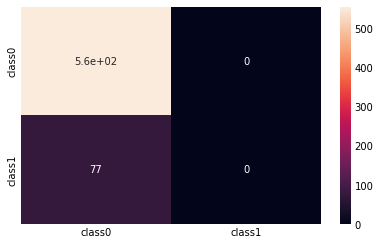

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_hat)
sns.heatmap(cm, annot=True, xticklabels=["class0","class1"], 
            yticklabels=["class0", "class1"]);

**Conclusions**
Ultimately, we were unable to many any definitive conclusions about what variables and demographics may be used to predict a person's health. However, we did find a number of promising correlative relationships between variables including the following:

1) Drinking decreases as education level increases   

2) Smokers tend to drink more than non-smokers

3) Smokers tend to be of a higher poverty status than non-smokers

4) Smokers are likelier to be overweight than non-smokers

One person’s overall health cannot be completely captured with the variables in the NHANES survey, but the survey can be used to inform future research and public health measures in order to promote the health of the nation more effectively. 